<a href="https://colab.research.google.com/github/Mohammed-Umair30/Mohammed-Umair30/blob/main/Task_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### `Task` How dimensionality reduction using Principal Component Analysis (PCA) on the Wine Quality dataset contributes to improving the classification accuracy and efficiency of wine type.

Note : Use KNN for Classification.

Data Link :  [Wine Data](https://docs.google.com/spreadsheets/d/e/2PACX-1vQDVwxneOKOaJL13QMhkAhYrgWlH1tICY7RacUnj_lL8m9uUWaaUf3p7bScNyh_D2Rvt7nc1q11adSy/pub?gid=647503637&single=true&output=csv)

In [24]:
# Data Loading
import pandas as pd
wine_data_path = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQDVwxneOKOaJL13QMhkAhYrgWlH1tICY7RacUnj_lL8m9uUWaaUf3p7bScNyh_D2Rvt7nc1q11adSy/pub?gid=647503637&single=true&output=csv"
wine = pd.read_csv(wine_data_path)
wine.head(1)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6


In [ ]:
# Your Code goes Here

In [25]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [26]:
wine.isna().sum()

,0
type,0
fixed acidity,10
volatile acidity,8
citric acid,3
residual sugar,2
chlorides,2
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,9


In [27]:
# We need to remove duplicated rows and missing value rows
import pandas as pd

# Load the Wine Quality dataset
wine_data = pd.read_csv(wine_data_path)
print("Wine Data Shape :", wine_data.shape)
# Drop rows with missing values
wine_data = wine_data.dropna()

# Dropping Duplicates rows
wine_data.drop_duplicates(inplace=True)
print("Wine Data Shape (After Dropping-) :", wine_data.shape)

Wine Data Shape : (6497, 13)
Wine Data Shape (After Dropping-) : (5295, 13)


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [29]:
# Separate features (physicochemical properties) and target variable (type)
X = wine_data.drop('type', axis=1)
y = wine_data['type']


In [30]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
# Train a K-Nearest Neighbors (KNN) classifier without PCA
knn_no_pca = KNeighborsClassifier(n_neighbors=5)
knn_no_pca.fit(X_train, y_train)

# Predict the wine type on the testing set without PCA
y_pred_no_pca = knn_no_pca.predict(X_test)

# Evaluate the classification accuracy without PCA
accuracy_no_pca = accuracy_score(y_test, y_pred_no_pca)
print("KNN having features -", X_train.shape[1])
print("Classification Accuracy without PCA: {:.2f}%".format(accuracy_no_pca * 100))

KNN having features - 12
Classification Accuracy without PCA: 92.92%


In [50]:
# Apply PCA on the standardized features
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train a K-Nearest Neighbors (KNN) classifier with PCA
knn_with_pca = KNeighborsClassifier(n_neighbors=5)
knn_with_pca.fit(X_train_pca, y_train)

# Predict the wine type on the testing set with PCA
y_pred_pca = knn_with_pca.predict(X_test_pca)

# Evaluate the classification accuracy with PCA
accuracy_pca = accuracy_score(y_test, y_pred_pca)

print("KNN having features -", X_train_pca.shape[1])
print("Classification Accuracy with PCA: {:.2f}%".format(accuracy_pca * 100))

KNN having features - 3
Classification Accuracy with PCA: 97.54%


In [51]:
pca.explained_variance_ratio_

array([0.25338398, 0.22064311, 0.13758045])

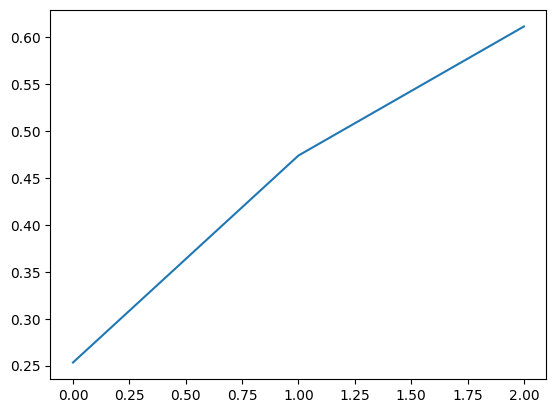

In [52]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [49]:
import plotly.express as px

In [54]:
y_train_trf=y_train.astype(str)
px.scatter_3d(x=X_train_scaled[:,0],y=X_train_scaled[:,1],z=X_train_scaled[:,2],color=y_train_trf,color_discrete_sequence = px.colors.qualitative.G10)